## Introduction

This project is still in DRAFT form! 

This project reads in Canadian population data from a table on a page in Wikipedia. It showcases how to read in the data, clean it up so it can be plotted, and then plots the data. 

The flow in the program follows the standard IPO programming model of Input-Process-Output. 

We look at two data cases:

- population by province, sorted from low population to high
- population density by province, sorted from low to high

TODO Update this comment once the project is finished.

## Import libraries

This code snippet imports two Python libraries for working with data. The first line is a comment that starts with `#` and explains the purpose of the next line. The second line uses the import keyword to load the pandas library, which is a popular tool for data manipulation and analysis. It also uses the as keyword to give pandas a shorter name, pd, which can be used later to access its features.

The third line is another comment that describes the next line. The fourth line imports the matplotlib library, which is a powerful tool for data visualization. It also gives matplotlib a shorter name, plt, which can be used to create plots and charts.

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for data visualization
import matplotlib.pyplot as plt


## Input: Get the Data

This code is a way of getting and showing the population data of Canada by province and territory from a Wikipedia page. Here is what each line does:

- The first line assigns a string value to a variable named url. This string is the web address of the Wikipedia page that has the data we want.
- The second line uses the pd.read_html function from the pandas library to read all the tables from the web page and store them in a list named tables. A list is a collection of items that can be accessed by their position.
- The third line assigns the first item of the list tables to a variable named df. This item is a pandas DataFrame, which is a data structure that holds tabular data in rows and columns. The first item of the list is the table we want because it has the population data of Canada by province and territory.
- The fourth line uses the display function to show the DataFrame df in a nice format. This function is useful for displaying data in notebooks or interactive shells.

In [2]:
# Define the URL of the Wikipedia page that contains the population data of Canada by province and territory
url = "https://en.wikipedia.org/wiki/Population_of_Canada_by_province_and_territory"

# Use pandas to read all the tables from the URL and store them in a list
tables = pd.read_html(url)

# Select the first table from the list, which is the one we want
df = tables[0]

# Display the dataframe
display(df)

Population                    Name[1] Population, 2021 Census              
   Population                    Name[1]                   Total Proportion   
0           1                    Ontario                14223942     38.45%  \
1           2                     Quebec                 8501833     22.98%   
2           3           British Columbia                 5000879     13.52%   
3           4                    Alberta                 4262635     11.52%   
4           5                   Manitoba                 1342153      3.63%   
5           6               Saskatchewan                 1132505      3.06%   
6           7                Nova Scotia                  969383      2.62%   
7           8              New Brunswick                  775610      2.09%   
8           9  Newfoundland and Labrador                  510550      1.38%   
9          10       Prince Edward Island                  154331      0.42%   
10         11      Northwest Territories                   41070      0.11%   
11         12                      Yukon                   40232      0.11%   
12         13                    Nunavut                   36858      0.10%   
13      Total                     Canada                36991981       100%   

   Growth, 2016–21 Land area (km2) Population density (per km2)   
   Growth, 2016–21 Land area (km2) Population density (per km2)   
0             5.8%       908699.33                        15.20  \
1             4.1%      1356625.27                         6.50   
2             7.6%       922503.01                         5.40   
3             4.8%       640330.46                         6.70   
4             5.8%       552370.99                         2.30   
5             3.4%       588243.54                         2.00   
6             5.0%        52942.27                        18.40   
7             3.8%        71388.81                        10.90   
8            -1.8%       370514.08                         1.40   
9             8.0%         5686.03                        27.20   
10           -1.7%      1143793.86                         0.04   
11           12.1%       474712.68                         0.08   
12            2.5%      1877778.53                         0.02   
13            5.2%      8965588.85                         4.20   

   House of Commons seats            Senate seats             
                    Total Proportion        Total Proportion  
0                     121      35.8%           24     22.86%  
1                      78      23.1%           24     22.86%  
2                      42      12.4%            6      5.71%  
3                      34      10.1%            6      5.71%  
4                      14       4.1%            6      5.71%  
5                      14       4.1%            6      5.71%  
6                      11       3.3%           10      9.52%  
7                      10       3.0%           10      9.52%  
8                       7       2.1%            6      5.71%  
9                       4       1.2%            4      3.81%  
10                      1       0.3%            1      0.95%  
11                      1       0.3%            1      0.95%  
12                      1       0.3%            1      0.95%  
13                    338       100%          105       100%

## Process: Clean the Data

### Fix the Table of Contents

If you look at the the output above you'll see that there are two contents rows, which makes plotting more difficult. Technically we have a "MultiIndex", as seen below:

In [3]:
display(df.columns) # default is a MultiIndex — Messy to work with! 

# create single index by merging the MultiIndex
# This is also messy but we'll rename the columns later

MultiIndex([(                  'Population',                   'Population'),
            (                     'Name[1]',                      'Name[1]'),
            (     'Population, 2021 Census',                        'Total'),
            (     'Population, 2021 Census',                   'Proportion'),
            (             'Growth, 2016–21',              'Growth, 2016–21'),
            (             'Land area (km2)',              'Land area (km2)'),
            ('Population density (per km2)', 'Population density (per km2)'),
            (      'House of Commons seats',                        'Total'),
            (      'House of Commons seats',                   'Proportion'),
            (                'Senate seats',                        'Total'),
            (                'Senate seats',                   'Proportion')],
           )

Let's eliminate the MultiIndex by joining the first row to the second. This isn't ideal but it can be cleaned up later by renaming the columns.

In [4]:
df.columns = df.columns.map('_'.join)  

display(df.head())

,Population_Population,Name[1]_Name[1],"Population, 2021 Census_Total","Population, 2021 Census_Proportion","Growth, 2016–21_Growth, 2016–21",Land area (km2)_Land area (km2),Population density (per km2)_Population density (per km2),House of Commons seats_Total,House of Commons seats_Proportion,Senate seats_Total,Senate seats_Proportion
0,1,Ontario,14223942,38.45%,5.8%,908699.33,15.2,121,35.8%,24,22.86%
1,2,Quebec,8501833,22.98%,4.1%,1356625.27,6.5,78,23.1%,24,22.86%
2,3,British Columbia,5000879,13.52%,7.6%,922503.01,5.4,42,12.4%,6,5.71%
3,4,Alberta,4262635,11.52%,4.8%,640330.46,6.7,34,10.1%,6,5.71%
4,5,Manitoba,1342153,3.63%,5.8%,552370.99,2.3,14,4.1%,6,5.71%


Let's now rename the column headers to clean it up. 

You'll notice I use underscores ("_") between the words. It's not necessary but it makes it easier for some of the programming we'll be doing later on. 

In [5]:
df = df.rename(columns={
    'Population_Population': 'Population_Rank',
    'Name[1]_Name[1]': 'Name',
    'Population, 2021 Census_Total': 'Population_2021',
    'Population, 2021 Census_Proportion': 'Population_Proportion',
    'Growth, 2016–21_Growth, 2016–21': 'Growth_2016_21',
    'Land area (km2)_Land area (km2)': 'Land_area_km2',
    'Population density (per km2)_Population density (per km2)': 'Population_density_per_km2',
    'House of Commons seats_Total': 'Commons_house_seats',
    'House of Commons seats_Proportion': 'Commons_seats_Proportion',
    'Senate seats_Total': 'Senate_seats',
    'Senate seats_Proportion': 'Senate_seats_Proportion'
})

display(df)

,Population_Rank,Name,Population_2021,Population_Proportion,Growth_2016_21,Land_area_km2,Population_density_per_km2,Commons_house_seats,Commons_seats_Proportion,Senate_seats,Senate_seats_Proportion
0,1,Ontario,14223942,38.45%,5.8%,908699.33,15.20,121,35.8%,24,22.86%
1,2,Quebec,8501833,22.98%,4.1%,1356625.27,6.50,78,23.1%,24,22.86%
2,3,British Columbia,5000879,13.52%,7.6%,922503.01,5.40,42,12.4%,6,5.71%
3,4,Alberta,4262635,11.52%,4.8%,640330.46,6.70,34,10.1%,6,5.71%
4,5,Manitoba,1342153,3.63%,5.8%,552370.99,2.30,14,4.1%,6,5.71%
5,6,Saskatchewan,1132505,3.06%,3.4%,588243.54,2.00,14,4.1%,6,5.71%
6,7,Nova Scotia,969383,2.62%,5.0%,52942.27,18.40,11,3.3%,10,9.52%
7,8,New Brunswick,775610,2.09%,3.8%,71388.81,10.90,10,3.0%,10,9.52%
8,9,Newfoundland and Labrador,510550,1.38%,-1.8%,370514.08,1.40,7,2.1%,6,5.71%
9,10,Prince Edward Island,154331,0.42%,8.0%,5686.03,27.20,4,1.2%,4,3.81%


We can look at the column names like this:

In [6]:
display(df.columns)

Index(['Population_Rank', 'Name', 'Population_2021', 'Population_Proportion',
       'Growth_2016_21', 'Land_area_km2', 'Population_density_per_km2',
       'Commons_house_seats', 'Commons_seats_Proportion', 'Senate_seats',
       'Senate_seats_Proportion'],
      dtype='object')

### Deleting Rows We Don't Need

If we look at the output above we'll see that there's a "Canada" line in the rows. We need to delete that! 

We can find that row by looking for the item in the Name column (`df.Name`) in the dataframe (called `df`) that equals "Canada":

In [7]:
df[df.Name == "Canada"]

,Population_Rank,Name,Population_2021,Population_Proportion,Growth_2016_21,Land_area_km2,Population_density_per_km2,Commons_house_seats,Commons_seats_Proportion,Senate_seats,Senate_seats_Proportion
13,Total,Canada,36991981,100%,5.2%,8965588.85,4.2,338,100%,105,100%


Deleting can only happen by using the index number (or value), so let's modify the above accordingly. You'll see that we add `.index` to the search term.

In [8]:
df[df.Name == "Canada"].index

Index([13], dtype='int64')

That will return the index number we need to delete. Putting it all together we get:

In [9]:
# Delete the row with the Name "Canada" and modify the original DataFrame
df.drop(df[df.Name == "Canada"].index, inplace=True)

display(df)

,Population_Rank,Name,Population_2021,Population_Proportion,Growth_2016_21,Land_area_km2,Population_density_per_km2,Commons_house_seats,Commons_seats_Proportion,Senate_seats,Senate_seats_Proportion
0,1,Ontario,14223942,38.45%,5.8%,908699.33,15.20,121,35.8%,24,22.86%
1,2,Quebec,8501833,22.98%,4.1%,1356625.27,6.50,78,23.1%,24,22.86%
2,3,British Columbia,5000879,13.52%,7.6%,922503.01,5.40,42,12.4%,6,5.71%
3,4,Alberta,4262635,11.52%,4.8%,640330.46,6.70,34,10.1%,6,5.71%
4,5,Manitoba,1342153,3.63%,5.8%,552370.99,2.30,14,4.1%,6,5.71%
5,6,Saskatchewan,1132505,3.06%,3.4%,588243.54,2.00,14,4.1%,6,5.71%
6,7,Nova Scotia,969383,2.62%,5.0%,52942.27,18.40,11,3.3%,10,9.52%
7,8,New Brunswick,775610,2.09%,3.8%,71388.81,10.90,10,3.0%,10,9.52%
8,9,Newfoundland and Labrador,510550,1.38%,-1.8%,370514.08,1.40,7,2.1%,6,5.71%
9,10,Prince Edward Island,154331,0.42%,8.0%,5686.03,27.20,4,1.2%,4,3.81%


Here's a full explanation of how the code above command works.

The command  deletes the row with the Name "Canada" from a DataFrame named df and modifies the original DataFrame:

- df[df.Name == "Canada"] creates a boolean mask that selects only the row where the Name column is equal to "Canada".
- .index returns the index value of that row, which is an integer or a label that identifies the row position.
- df.drop() removes the row with the given index value from the DataFrame and returns a new DataFrame without that row.
- inplace=True tells the drop method to modify the original DataFrame instead of returning a new one. This means that df will be updated with the row removed.

### Delete the Columns We Don't Need

In [10]:
#TODO Delete the columns we don't need -- IN PROGRESS!



### How Do We Sort the Data?

We need to sort the data by the way we want to plot it. In our first case, we want to sort it by population, which the `Population_2021` column.

This code sorts a DataFrame named df by the values of a column named Population_2021 in ascending order. Here is what it does:

- `df.sort_values()` is a method of Pandas DataFrame that returns a new DataFrame with the rows sorted by one or more columns.
- `by="Population_2021"` is a parameter that specifies the column or columns to sort by. In this case, it is a single column name as a string. You can also pass a list of column names to sort by multiple columns.
- `ascending=True` is another parameter that specifies the order of sorting. If `True`, the rows are sorted in ascending order, meaning from smallest to largest values. If `False`, the rows are sorted in descending order, meaning from largest to smallest values. 

The result of this code is a new DataFrame with the same columns as df, but with the rows rearranged according to the Population_2021 values from lowest to highest. The original DataFrame df is not modified unless you assign the result back to it or use the `inplace` parameter.

In [11]:
# Sort the data by name alphabetically
df = df.sort_values(by="Population_2021", ascending=True)

display(df)

,Population_Rank,Name,Population_2021,Population_Proportion,Growth_2016_21,Land_area_km2,Population_density_per_km2,Commons_house_seats,Commons_seats_Proportion,Senate_seats,Senate_seats_Proportion
12,13,Nunavut,36858,0.10%,2.5%,1877778.53,0.02,1,0.3%,1,0.95%
11,12,Yukon,40232,0.11%,12.1%,474712.68,0.08,1,0.3%,1,0.95%
10,11,Northwest Territories,41070,0.11%,-1.7%,1143793.86,0.04,1,0.3%,1,0.95%
9,10,Prince Edward Island,154331,0.42%,8.0%,5686.03,27.20,4,1.2%,4,3.81%
8,9,Newfoundland and Labrador,510550,1.38%,-1.8%,370514.08,1.40,7,2.1%,6,5.71%
7,8,New Brunswick,775610,2.09%,3.8%,71388.81,10.90,10,3.0%,10,9.52%
6,7,Nova Scotia,969383,2.62%,5.0%,52942.27,18.40,11,3.3%,10,9.52%
5,6,Saskatchewan,1132505,3.06%,3.4%,588243.54,2.00,14,4.1%,6,5.71%
4,5,Manitoba,1342153,3.63%,5.8%,552370.99,2.30,14,4.1%,6,5.71%
3,4,Alberta,4262635,11.52%,4.8%,640330.46,6.70,34,10.1%,6,5.71%


## Output: Plot the Population for Each Province

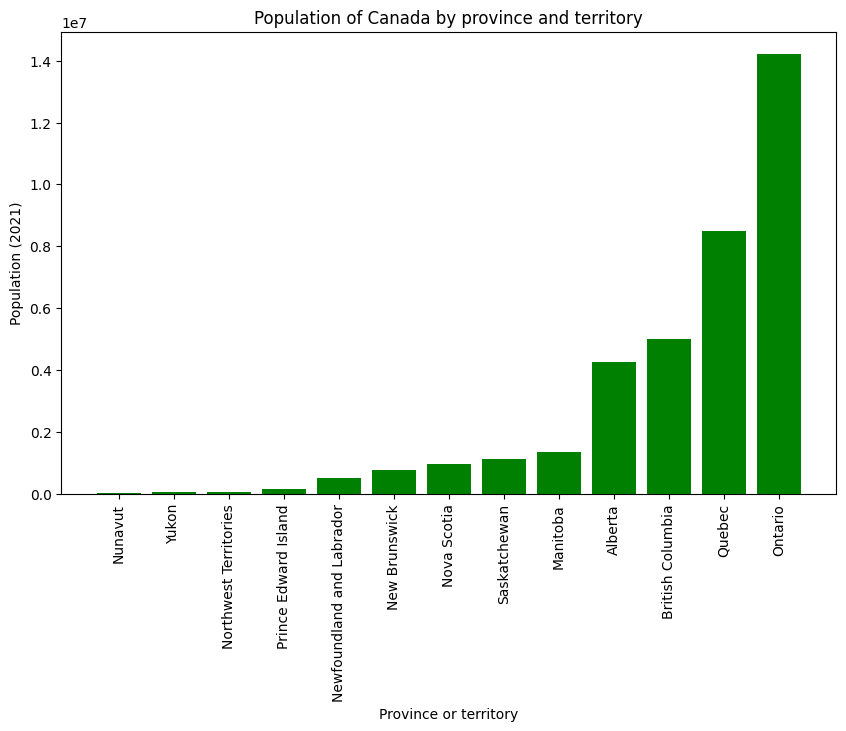

In [12]:
# Plot the bar chart for population
plt.figure(figsize=(10,6)) # Set the figure size
plt.bar(df["Name"], df["Population_2021"], color="green") # Plot the bars
plt.xticks(rotation=90) # Rotate the x-axis labels
plt.xlabel("Province or territory") # Set the x-axis label
plt.ylabel("Population (2021)") # Set the y-axis label
plt.title("Population of Canada by province and territory") # Set the title
plt.show() # Show the plot

## Output: Plot the Population Densities

In [13]:
#TODO Comment this code

df = df.sort_values("Population_density_per_km2")

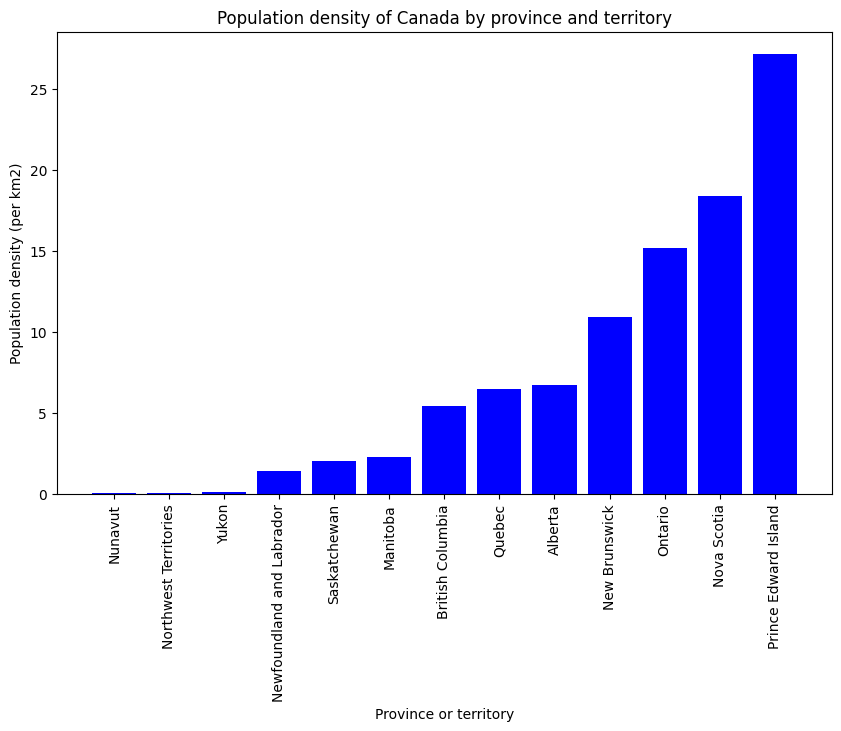

In [14]:
# Plot the bar chart for density
plt.figure(figsize=(10,6)) # Set the figure size
plt.bar(df["Name"], df["Population_density_per_km2"], color="blue") # Plot the bars
plt.xticks(rotation=90) # Rotate the x-axis labels
plt.xlabel("Province or territory") # Set the x-axis label
plt.ylabel("Population density (per km²)") # Set the y-axis label
plt.title("Population density of Canada by province and territory") # Set the title
plt.show() # Show the plot